<a href="https://colab.research.google.com/github/vector777-ai/FaceRecognition/blob/master/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive

/content/drive


In [3]:
cd My Drive

/content/drive/My Drive


In [4]:
cd FaceRecognition

/content/drive/My Drive/FaceRecognition


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
FRmodel=faceRecoModel(input_shape=(3, 96, 96))

In [0]:
def triplet_loss(y_true,y_pred,alpha = 0.2):
  anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
  pos_dist = tf.reduce_sum(tf.square(anchor - positive))
  neg_dist = tf.reduce_sum(tf.square(anchor - negative))
  basic_loss = pos_dist - neg_dist + alpha
  loss = tf.maximum(basic_loss, 0)
  return loss

In [8]:
FRmodel.compile(optimizer='adam',loss=triplet_loss,metrics=['accuracy'])
load_weights_from_FaceNet(FRmodel)

In [0]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [0]:
database={}
for person in os.listdir('./DataBase'): 
  for pic in os.listdir('./DataBase/'+person):
    img=0
    img1=cv2.imread('./DataBase/'+person+'/'+pic,1)
    gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
      face=img1[y:y+h,x:x+w]
      face=cv2.resize(face,(96,96))
      cv2.imwrite('./DataBase_face/'+person+'/'+pic,face)
      encd=img_to_encoding('./DataBase_face/'+person+'/'+pic,FRmodel)
      img=img+encd
    img=img/3
    database[person]=img
    

In [0]:
def search_from_DB(image_path, database, model):
    encoding = img_to_encoding(image_path, model)
    min_dist = 100
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(db_enc - encoding)
        if dist < min_dist:
            min_dist = dist
            identity = name
    if min_dist > 0.8:
        print("Not in the database.")
    else:
        print ("it's " + str(identity))
    return min_dist, identity

it's Arpit


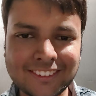

it's Aditya


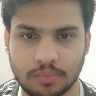

it's OP


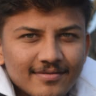

it's Buddh


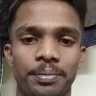

In [34]:
for pic in os.listdir('./test'):
  img=cv2.imread('./test/'+pic,1)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=face_cascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    face=img[y:y+h,x:x+w]
    face=cv2.resize(face,(96,96))
    cv2.imwrite('./test_face/'+pic,face)
    min_dist,identity=search_from_DB('./test_face/'+pic,database,FRmodel)
    cv2_imshow(face)